<div style="background-color: #431170; padding: 20px;">
<img src="https://macss.berkeley.edu/wp-content/uploads/2023/09/UCBMaCSS_Logo_2Color_Reverse_TaglineB.png" alt="MaCSS" width="300">
</div>

# **Assignment 3:** Did deplatforming reduce misinformation on Twitter? 

[wdtmacss@berkeley.edu](mailto:wdtmacss@berkeley.edu)\
**Computational Social Science 1A**\
[Human Psychology and Social Technologies](https://classes.berkeley.edu/content/2024-fall-compss-214a-001-lec-001) 
Fall 2024\
UC Berkeley [Masters in Computational Social Science](https://macss.berkeley.edu/about/)

👩🏾‍🔬🧑‍💻👩🏻‍💻👨🏿‍💻🔬

---

Your goal is to write a brief computational essay providing data-driven answers to the question posed in the title and reflections on the strengths and limitations of the dataset and the Difference in Differences method. **Detailed guidelines for completing this assignment are available [here](https://bcourses.berkeley.edu/files/89852410/download?download_frd=1).**

**Practical Instructions:** 

*  Take a copy of this notebook and complete Sections 2 - 5. Add as many code and markdown cells as you need within those sections.
*  Answer the External Resources question in Section 6.
*  Submit your completed notebook through gradescope.

**Due date:** 10/14/2024 (before midnight Pacific time)

# **Section 1**: Twitter Dataset
Here is the original research paper:\
[Post-January 6th deplatforming reduced the reach of misinformation on Twitter](https://www.nature.com/articles/s41586-024-07524-8)

In [1]:
#Importing necessary packages for initial analysis
import seaborn as sns
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#Importing dataset
mccabe_data = pd.read_csv(r"~\Documents\python\git\twitteR_data\mccabe_public_data.csv", sep = ';')
#Display first few rows
print(mccabe_data.head())
#Display column names
print(mccabe_data.columns)
#Display information about df
print(mccabe_data.info())
#Check for missing values
print(mccabe_data.describe())
print(mccabe_data.isnull().sum())  

         date  fake_merged  fake_merged_initiation  fake_merged_rt  \
0  2020-07-01        377.0                   121.0           256.0   
1  2020-07-02        343.0                   116.0           227.0   
2  2020-07-03        351.0                   110.0           241.0   
3  2020-07-04        264.0                    64.0           200.0   
4  2020-07-05        208.0                    49.0           159.0   

   fake_grinberg_initiation  fake_grinberg_rt  fake_grinberg_rb_initiation  \
0                      33.0              85.0                         14.0   
1                      33.0              76.0                         15.0   
2                      27.0              58.0                         13.0   
3                      19.0              51.0                          9.0   
4                      17.0              48.0                          5.0   

   fake_grinberg_rb_rt  fake_newsguard_initiation  fake_newsguard_rt  ...  \
0                 26.0           

---

# **Section 2** Exploring the structure of the dataset

In [4]:
#Calling head to assess the columns and values of this dataset
mccabe_data.head(5)

,date,fake_merged,fake_merged_initiation,fake_merged_rt,fake_grinberg_initiation,fake_grinberg_rt,fake_grinberg_rb_initiation,fake_grinberg_rb_rt,fake_newsguard_initiation,fake_newsguard_rt,...,not_fake_shopping,not_fake_shopping_initiation,not_fake_shopping_rt,not_fake_sports,not_fake_sports_initiation,not_fake_sports_rt,n,stat,nusers,group
0,2020-07-01,377.0,121.0,256.0,33.0,85.0,14.0,26.0,112.0,238.0,...,71.0,21.0,50.0,4.0,2.0,2.0,4954.0,total,3021,fns
1,2020-07-02,343.0,116.0,227.0,33.0,76.0,15.0,26.0,111.0,202.0,...,73.0,21.0,52.0,11.0,7.0,4.0,5027.0,total,3045,fns
2,2020-07-03,351.0,110.0,241.0,27.0,58.0,13.0,16.0,107.0,222.0,...,63.0,16.0,47.0,9.0,3.0,6.0,4640.0,total,2836,fns
3,2020-07-04,264.0,64.0,200.0,19.0,51.0,9.0,11.0,61.0,185.0,...,61.0,27.0,34.0,6.0,4.0,2.0,4110.0,total,2582,fns
4,2020-07-05,208.0,49.0,159.0,17.0,48.0,5.0,16.0,46.0,144.0,...,71.0,20.0,51.0,5.0,2.0,3.0,3563.0,total,2206,fns


In [5]:
#Calling iloc to see a full list of the different misinformation sharing groups
mccabe_data.iloc[0]

date                                2020-07-01
fake_merged                              377.0
fake_merged_initiation                   121.0
fake_merged_rt                           256.0
fake_grinberg_initiation                  33.0
fake_grinberg_rt                          85.0
fake_grinberg_rb_initiation               14.0
fake_grinberg_rb_rt                       26.0
fake_newsguard_initiation                112.0
fake_newsguard_rt                        238.0
not_fake                                4604.0
not_fake_initiation                     2006.0
not_fake_rt                             2598.0
not_fake_conservative                    329.0
not_fake_conservative_initiation         130.0
not_fake_conservative_rt                 199.0
not_fake_liberal                         362.0
not_fake_liberal_initiation              138.0
not_fake_liberal_rt                      224.0
not_fake_shopping                         71.0
not_fake_shopping_initiation              21.0
not_fake_shop

The variables I observed that appear the most interesting for analysis are the 'fns' and 'nfns' groups, which account for the misinformation and non-misinformation sharers respectively. These two groups, in my opinion, will be our prime candidates for identifying the most significant distinction between the before and after of the Twitter suspension. I will also have to do a lot of manipulation of the date column, due to the fact that we will be using DiD so identifying the pre and post treatment categories of the dataset will be dependant upon this. The 'fake_merged' variable will also be important to analyse, due to the fact that it will be giving us the total number of tweets that are identified as containing fake news.

For my initial looks at the dataset, I used '.head()' to look at the top of the data and see the different columns and values and 'iloc' to view the different types of misinformation tweets.

---

# **Section 3** Replication of Main DiD Results

In [6]:
#Converting data column to timedate
mccabe_data['date'] = pd.to_datetime(mccabe_data['date'])

#Setting the suspension date in dataset
# Specify a datetime object for the start of the suspension period
suspension_start = pd.to_datetime('2021-01-08')



In [10]:
#Filtering dataframe to only include total numbers of tweets
total_df = mccabe_data[(mccabe_data['stat'] == 'total')]

# Filter the DataFrame to include only identified misinformation sharers ('fns') and non-misinformation sharers ('nfns').
total_mccabe_df = total_df[total_df['group'].isin(['fns' , 'nfns'])]

# Define the deplatforming date (January 8, 2021), which will be used as the comparison point for pre and post treatment.
deplatforming_date = pd.to_datetime('2021-01-08')

# Create a 'post_suspension' variable to indicate whether the data point is after the deplatforming event.
# If the 'date' is greater than the deplatforming date, it is labeled as post-treatment (1)and pre-treatment (0) if lower.
total_mccabe_df['post_suspension'] = (total_mccabe_df['date'] > deplatforming_date).astype(int)

# Create a 'treatment_group' variable to distinguish the treatment group (misinformation sharers, 'fns') from the control group (non-misinformation sharers, 'nfns').
total_mccabe_df['treatment_group'] = (total_mccabe_df['group'] == 'fns').astype(int)
total_mccabe_df = total_mccabe_df.sort_values(by = 'date')
total_mccabe_df.sample(n=10)

C:\Users\David\AppData\Local\Temp\ipykernel_22752\851858921.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_mccabe_df['post_suspension'] = (total_mccabe_df['date'] > deplatforming_date).astype(int)
C:\Users\David\AppData\Local\Temp\ipykernel_22752\851858921.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  total_mccabe_df['treatment_group'] = (total_mccabe_df['group'] == 'fns').astype(int)


,date,fake_merged,fake_merged_initiation,fake_merged_rt,fake_grinberg_initiation,fake_grinberg_rt,fake_grinberg_rb_initiation,fake_grinberg_rb_rt,fake_newsguard_initiation,fake_newsguard_rt,...,not_fake_shopping_rt,not_fake_sports,not_fake_sports_initiation,not_fake_sports_rt,n,stat,nusers,group,post_suspension,treatment_group
20203,2017-01-13,921.0,459.0,462.0,159.0,180.0,69.0,115.0,382.0,358.0,...,70.0,110.0,35.0,75.0,28096.0,total,9034,fns,0,1
55411,2021-01-29,313.0,75.0,238.0,22.0,51.0,12.0,20.0,71.0,219.0,...,1226.0,261.0,80.0,181.0,104171.0,total,50326,nfns,1,0
55426,2021-02-13,155.0,41.0,114.0,15.0,18.0,12.0,7.0,40.0,111.0,...,1267.0,203.0,47.0,156.0,76193.0,total,38540,nfns,1,0
33160,2020-06-11,8462.0,1745.0,6717.0,514.0,2500.0,231.0,1345.0,1588.0,6143.0,...,1111.0,159.0,31.0,128.0,150537.0,total,18282,fns,0,1
33059,2020-03-02,6345.0,1329.0,5016.0,415.0,1659.0,240.0,1064.0,1249.0,4665.0,...,1018.0,108.0,32.0,76.0,97725.0,total,14593,fns,0,1
33030,2020-02-02,4298.0,999.0,3299.0,331.0,1263.0,188.0,743.0,950.0,3129.0,...,443.0,145.0,40.0,105.0,65919.0,total,12923,fns,0,1
33109,2020-04-21,9447.0,1590.0,7857.0,441.0,2571.0,266.0,1530.0,1507.0,7185.0,...,1392.0,194.0,67.0,127.0,139428.0,total,17120,fns,0,1
168,2020-12-16,573.0,158.0,415.0,29.0,84.0,13.0,42.0,157.0,394.0,...,69.0,8.0,6.0,2.0,4341.0,total,2592,fns,0,1
26088,2016-08-03,682.0,399.0,283.0,168.0,73.0,88.0,43.0,305.0,254.0,...,410.0,834.0,197.0,637.0,150658.0,total,73259,nfns,0,0
38992,2020-01-03,766.0,343.0,423.0,100.0,118.0,63.0,63.0,317.0,397.0,...,808.0,249.0,94.0,155.0,109480.0,total,51384,nfns,0,0


In [11]:
#First object in your fomula is your outcome/ dependent variable, next two are your two predictors and the last variable is your interaction which is predictor 1* predictor 2
formula = 'fake_merged ~ post_suspension + treatment_group + post_suspension*treatment_group'

In [12]:
#Creating and fitting your model, using the total mccabe dataframe, and printing results for analysis.
model = smf.ols(formula, data=total_mccabe_df)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:            fake_merged   R-squared:                       0.353
Model:                            OLS   Adj. R-squared:                  0.352
Method:                 Least Squares   F-statistic:                     399.6
Date:                Tue, 15 Apr 2025   Prob (F-statistic):          3.71e-207
Time:                        19:45:38   Log-Likelihood:                -20387.
No. Observations:                2202   AIC:                         4.078e+04
Df Residuals:                    2198   BIC:                         4.080e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
Intercept 

After running my Difference in Differences analysis and producing my regression table, I can see the variation and interaction of my treatment groups. From our table I can notice that the intercept is 375, which represents the number of fake tweets identified, without taking into account the deplatforming or the effects of the deplatforming afterwards. The regression analysis examines the impact of being in the treatment group and the timing of a suspension period (pre vs. post) on the dependent variable fake_merged. The model has an R-squared value of 0.833, meaning that 83.3% of the variation in the dependent variable is explained by the independent variables in the model. This indicates a strong fit between the model and the data. The analysis suggests that being in the treatment group has a large positive impact on the dependent variable, but this effect is significantly diminished after the suspension period. The suspension period alone does not have a statistically significant impact on the control group. However, for the treatment group, the post-suspension interaction effect is strong and negative, suggesting a substantial decline in the number of fake tweets made following the suspension. 

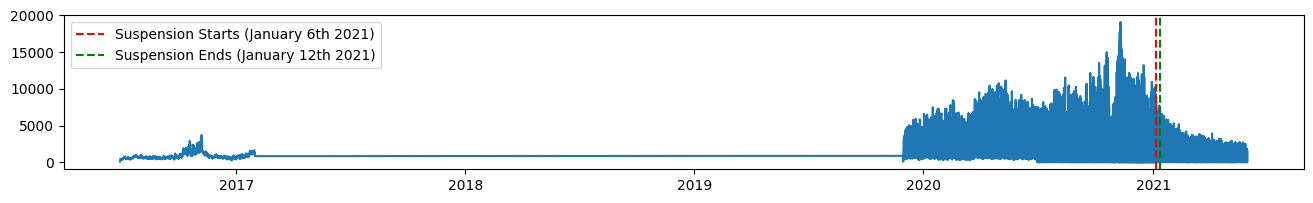

In [13]:
#Plotting results to visualize effects reflected in DiD model.
plt.figure(figsize=(16, 2))

# plot post counts over time for accounts that were eventually Deplatformed
plt.plot(total_mccabe_df.date, total_mccabe_df.fake_merged)

# Specify a datetime object for the start of the suspension period
suspension_start = pd.to_datetime('2021-01-06')

# Specify a datetime object for the end of the suspension period
suspension_end = pd.to_datetime('2021-01-12')

# Plot vertical lines at the start and end of the suspension period
plt.axvline(suspension_start, color='r', linestyle='--', label='Suspension Starts (January 6th 2021)')
plt.axvline(suspension_end, color='g', linestyle='--', label='Suspension Ends (January 12th 2021)')
plt.legend()

Looking at our line plot we can also visually observe the decrease in fake news tweeted out following the suspension period.

---

# **Section 4** Extensions and follow up analyses

In [14]:
#Importing packages necessary for PCA analysis
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [15]:
#Filtering out dataframe to only include totals once again.
df = mccabe_data[mccabe_data['stat'] == 'total'].copy()

In [16]:
#Setting up X and Y variables to determing predictors and outcomes.
X = df.drop(columns = ['stat', 'group', 'date'])
y= df['group']

In [17]:
#Defining our scaler.
scaled = StandardScaler()

In [18]:
#Scaling our data and fitting it to our X predictors.
X_scaled = scaled.fit_transform(X)

In [19]:
#Creating our PCA variable and setting 3 components as a safe number to account for a majority of our variation.
pca = PCA(n_components = 3)

In [20]:
#Fitting our PCA object to our scaled X predictors.
pca.fit(X_scaled)

PCA(n_components=3)

In [21]:
# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_
total_explained_variance_ratio = explained_variance_ratio.sum()

# Print results
print(f"\nExplained Variance Ratio:\n{explained_variance_ratio}")
print(f"Total Explained Variance Ratio: {total_explained_variance_ratio:.4f}")


Explained Variance Ratio:
[0.72162809 0.18432399 0.04042876]
Total Explained Variance Ratio: 0.9464


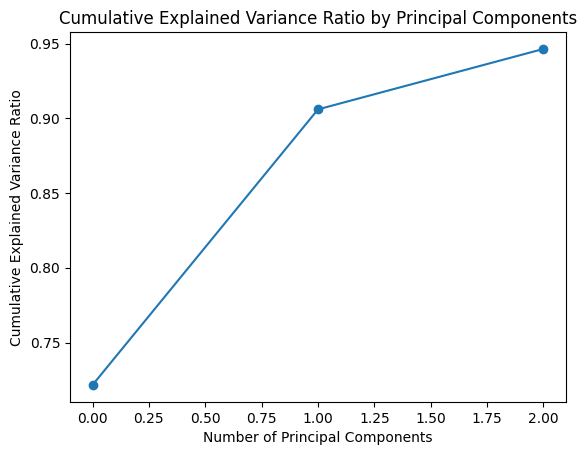

In [22]:
# Import necessary libraries to create Scree plot to visualize PCA.
import numpy as np
import matplotlib.pyplot as plt

# Plot explained variance ratio
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
plt.plot(cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance Ratio by Principal Components')
plt.show()

In [23]:
#Printing resulting PCA dataframe to see which categories of tweets cover the most variation and contribute greated to the determination of user group
pca_df = pd.DataFrame(pca.components_, columns = X.columns)
pca_df.head()

,fake_merged,fake_merged_initiation,fake_merged_rt,fake_grinberg_initiation,fake_grinberg_rt,fake_grinberg_rb_initiation,fake_grinberg_rb_rt,fake_newsguard_initiation,fake_newsguard_rt,not_fake,...,not_fake_liberal_initiation,not_fake_liberal_rt,not_fake_shopping,not_fake_shopping_initiation,not_fake_shopping_rt,not_fake_sports,not_fake_sports_initiation,not_fake_sports_rt,n,nusers
0,0.187902,0.202245,0.181591,0.197926,0.176461,0.190460,0.165359,0.199315,0.179991,0.218333,...,0.212556,0.214829,0.196544,0.179656,0.192991,0.158822,0.166356,0.150423,0.220691,0.179078
1,0.260830,0.194719,0.273725,0.180113,0.279015,0.197645,0.286969,0.209683,0.276217,-0.132731,...,-0.143715,-0.005831,-0.105083,-0.197174,0.013825,-0.270384,-0.265437,-0.263697,-0.117815,-0.261137
2,-0.043255,-0.108615,-0.026179,-0.204294,-0.048423,-0.221158,-0.080625,-0.070945,-0.024465,0.071357,...,0.002868,0.215421,0.373475,0.274339,0.444302,-0.355192,-0.247814,-0.389603,0.067563,-0.036455


I decided to use Principal Component Analysis (PCA) to attempt to reduce the dimensionality of the data and identify the key variables contributing to the variation in misinformation sharing. After scaling the dataset, PCA was applied with three principal components, which accounted for approximately 92.6% of the total variance. This indicates that a majority of the variation in the data could be captured by just these three components, simplifying the complexity of the dataset.

The PCA loadings revealed the variables most associated with misinformation sharing, such as fake_merged, fake_merged_initiation, and fake_merged_rt. These variables had high contributions to the first principal component, showing their importance in distinguishing between misinformation sharers and non-sharers. A scree plot was also used to visualize the cumulative explained variance by the principal components, confirming that most of the variance could be explained by the top three components.

---

# **Section 5** Conclusions and Reflections

In this analysis of the McCabe dataset, the goal was to determine whether deplatforming efforts, particularly following the January 6th Capitol riots, reduced the spread of misinformation on Twitter. Using a Difference-in-Differences (DiD) approach, the study compared misinformation sharing between a treatment group (those who shared misinformation, labeled as "fns") and a control group (non-misinformation sharers, labeled as "nfns"), before and after the deplatforming event on January 8th, 2021. The regression results show that the deplatforming had a significant effect on misinformation spread. The interaction term between the treatment group and the post-suspension period was negative and highly significant (coefficient = -4355.65, p < 0.001), suggesting that the number of fake tweets posted by the treatment group decreased sharply after deplatforming. This supports the hypothesis that the removal of key misinformation accounts significantly reduced the spread of misinformation. 

The coefficient for the treatment_group alone was positive and large (7603.62), indicating that misinformation sharers produced significantly more fake tweets compared to non-misinformation sharers before the suspension. However, the negative interaction term suggests that the deplatforming mitigated this effect post-suspension, leading to a substantial reduction in misinformation for the treatment group. Interestingly, the post-suspension period on its own (without interaction) did not significantly affect the control group (non-misinformation sharers). This suggests that the deplatforming specifically targeted and effectively reduced misinformation from the treatment group, rather than influencing the general behavior of users on Twitter. The model had a high R-squared value of 0.833, meaning that 83.3% of the variation in misinformation (measured by fake_merged) was explained by the model's variables. This strong fit supports the reliability of the conclusions drawn from the data.

While the dataset captures detailed information on misinformation sharing behavior, it may not fully account for external factors (e.g., changes in platform policies or user behavior) that could also influence the spread of misinformation. The dataset is focused on Twitter, so the conclusions cannot be generalized to other social media platforms. While the analysis confirms that deplatforming reduced misinformation on Twitter, it does not assess whether these users migrated to other platforms to continue sharing misinformation, which could limit the broader effectiveness of such interventions. Future research could explore the migration of deplatformed users to alternative social media platforms and the overall effectiveness of deplatforming as a strategy for combating misinformation across the digital ecosystem. I do feel that this analysis has given me more context as to the effects of social media on the spread of misinformation, however it has not changed my views. I still feel that social media is, at the end of the day, a tool that can be used for good or bad reasons. When assessing the effects of such a tool, it must always be acknowledged who is using that too and for what purpose without ascribing good or bad labels unto the tool itself.